<a href="https://www.kaggle.com/code/ramdhanprajapat/mobile-price-prediction?scriptVersionId=182034428" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-phone-price-prediction/mobile phone price prediction.csv


In [2]:
df = pd.read_csv('/kaggle/input/mobile-phone-price-prediction/mobile phone price prediction.csv')

In [3]:
#Shape of the dataset
df.shape

(1370, 18)

In [4]:
# Head of the dataset
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [5]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [6]:
# Check the null values in the dataset
df.isnull().sum()

Unnamed: 0             0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

In [7]:
#remove the null values

int_columns = ["Ram", "Battery", "Display", "External_Memory", "Android_version", "Price", "Inbuilt_memory", "fast_charging", "Screen_resolution"]
df['Price'] = df['Price'].str.replace(',', '').astype(int)
for column in int_columns:
    # Ensure the column is treated as a string before extracting numeric parts
    df[column] = df[column].astype(str).str.extract('(\d+)').astype(float)
    
    if df[column].isnull().any():
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   float64
 6   Battery            1370 non-null   float64
 7   Display            1370 non-null   float64
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   float64
 10  Android_version    1370 non-null   float64
 11  Price              1370 non-null   float64
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1370 non-null   float64
 14  fast_charging      1370 non-null   float64
 15  Screen_resolution  1370 non-null   float64
 16  Processor          1342 

In [8]:
df['Processor']= df['Processor'].fillna("Octa Core")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   float64
 6   Battery            1370 non-null   float64
 7   Display            1370 non-null   float64
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   float64
 10  Android_version    1370 non-null   float64
 11  Price              1370 non-null   float64
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1370 non-null   float64
 14  fast_charging      1370 non-null   float64
 15  Screen_resolution  1370 non-null   float64
 16  Processor          1370 

In [9]:
# change the data types of the columns
float_col = ["Rating", "Display"]
int_col = ["Spec_score", "Ram", "Battery", "Android_version", "Price", "Inbuilt_memory", "fast_charging", "Screen_resolution"]
df[float_col] = df[float_col].astype(float)
df[int_col] = df[int_col].astype(int)

In [10]:
# drop unnecessary columns
df.drop(['Unnamed: 0','Name'], axis=1, inplace=True)
df.head()

,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4,6000,6.0,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,1.0,13,9999,Samsung,128,25,2408,Octa Core Processor,Exynos 1330
1,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2,4000,6.0,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,512.0,10,9990,Samsung,32,15,720,1.8 GHz Processor,Octa Core
2,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4,5000,6.0,50 MP Quad Rear &amp; 8 MP Front Camera,1.0,12,11999,Samsung,64,25,1080,2 GHz Processor,Octa Core
3,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4,6000,6.0,48 MP Quad Rear &amp; 13 MP Front Camera,1.0,12,11999,Samsung,64,18,720,Octa Core,Helio G88
4,4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4,5000,6.0,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,1.0,11,11999,Samsung,64,15,720,Octa Core,Helio P35


## Data Visualization

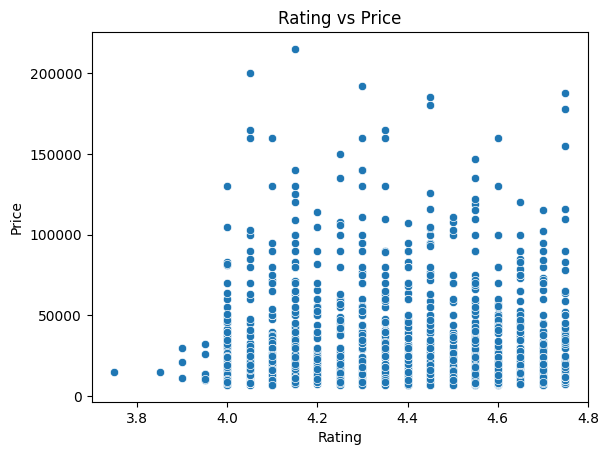

In [11]:
# Scatter plot for Rating vs Priceplt.figure(figsize=(10, 6))
import seaborn as sns 
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='Rating', y='Price')
plt.title('Rating vs Price')
plt.show()

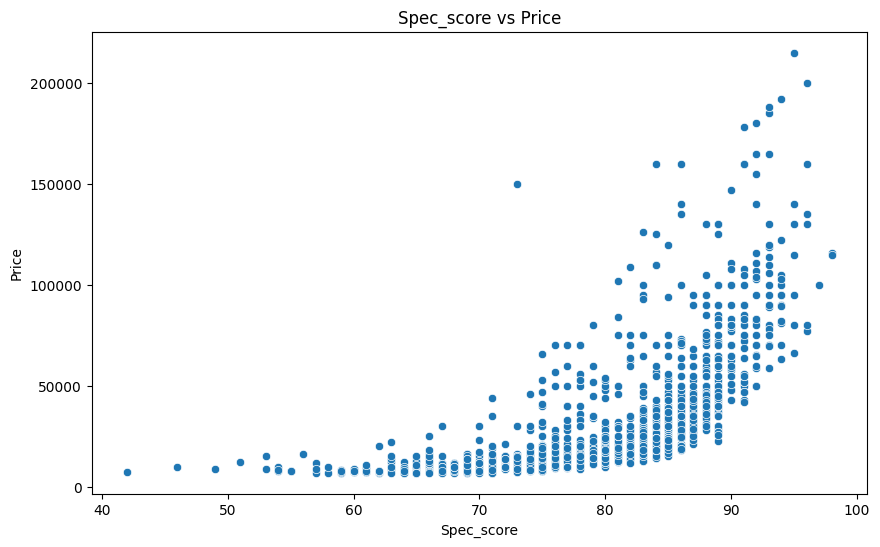

In [12]:
# Scatter plot for Spec_score vs Price

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Spec_score', y='Price')
plt.title('Spec_score vs Price')
plt.show()

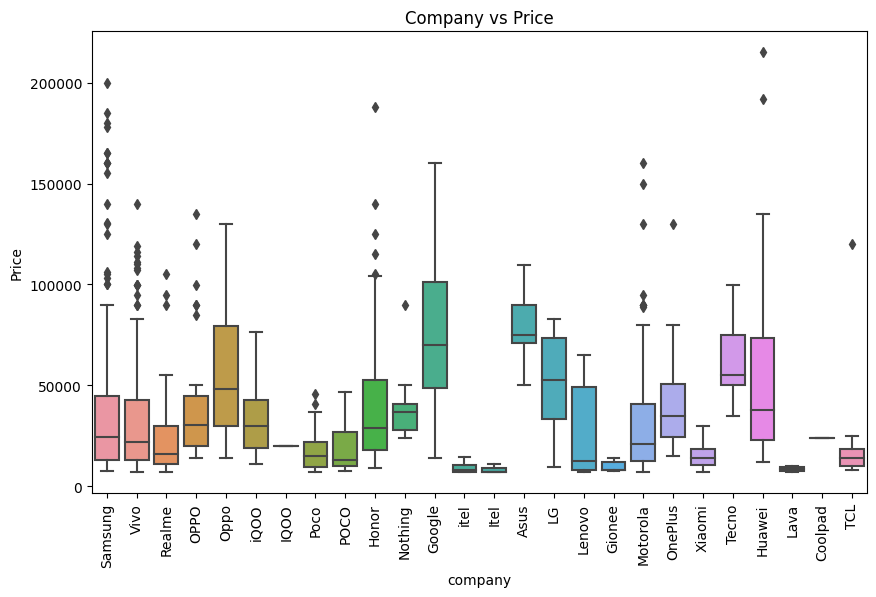

In [13]:
# Box plot for Company vs Price

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company', y='Price')
plt.title('Company vs Price')
plt.xticks(rotation=90)
plt.show()

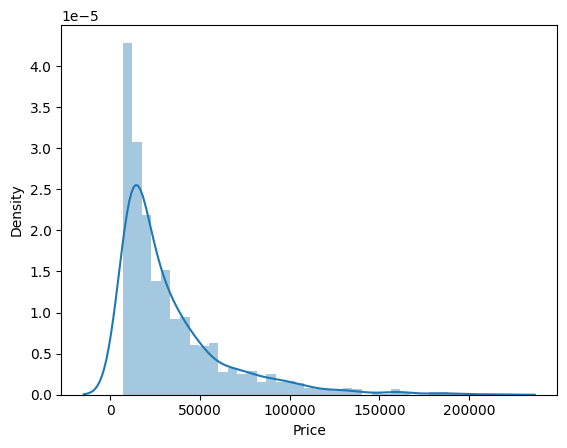

In [14]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.distplot(df['Price'])
plt.show()

<Axes: xlabel='company'>

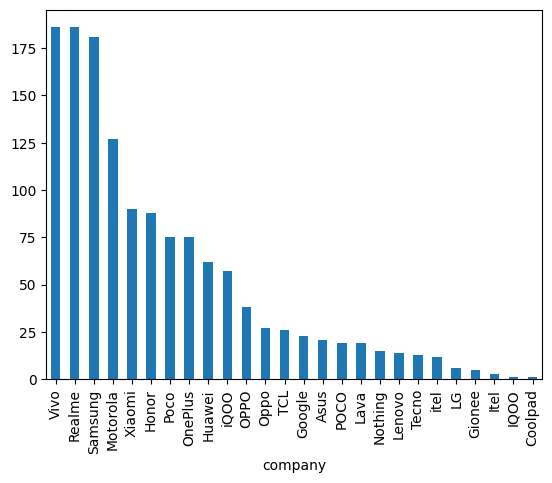

In [15]:
df['company'].value_counts().plot(kind="bar")

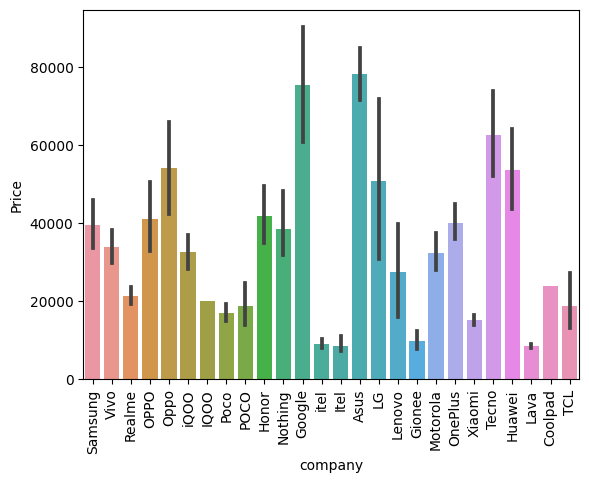

In [16]:
sns.barplot(x=df['company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Display', ylabel='Price'>

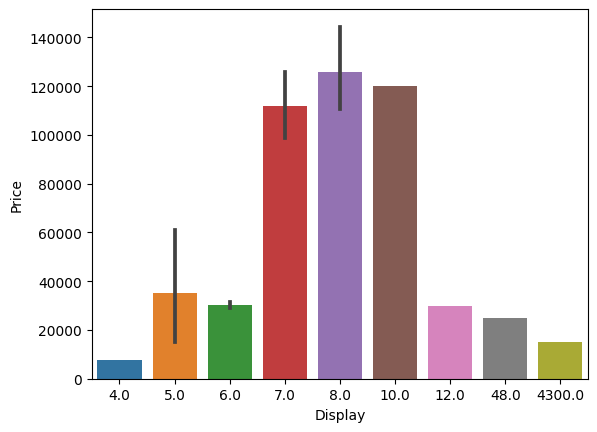

In [17]:
sns.barplot(x=df['Display'],y=df['Price'])

<Axes: >

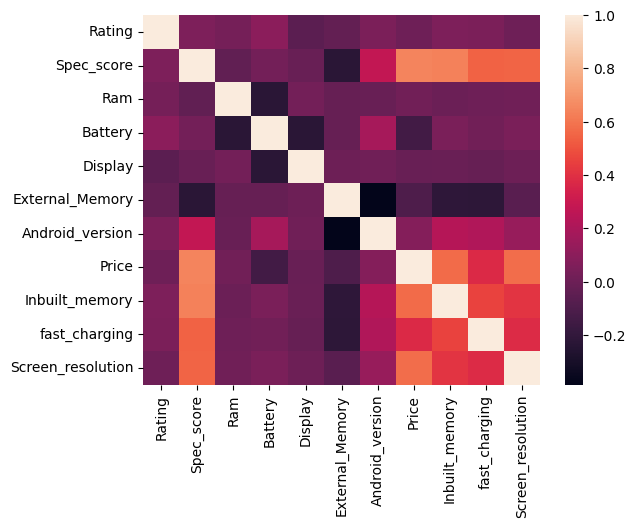

In [18]:
sns.heatmap(df.corr(numeric_only=True))

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
obj_col = df.select_dtypes(include='object').columns
for col in obj_col:
    df[col] = le.fit_transform(df[col])

In [20]:
df.head()

,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,4.65,68,1,4,6000,6.0,187,1.0,13,9999,19,128,25,2408,12,67
1,4.20,63,3,2,4000,6.0,59,512.0,10,9990,19,32,15,720,2,134
2,4.30,75,3,4,5000,6.0,275,1.0,12,11999,19,64,25,1080,4,134
3,4.10,73,3,4,6000,6.0,139,1.0,12,11999,19,64,18,720,11,108
4,4.10,69,3,4,5000,6.0,52,1.0,11,11999,19,64,15,720,11,118


In [21]:
# Feature Engineering

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
dummie_df = pd.get_dummies(df, drop_first=True) # Create dummy variables for categorical features
dummie_df.shape

(1369, 16)

In [24]:
# Identify features with a correlation greater than 0.15 with the target variable
corr_u =dummie_df.corr()['Price'].sort_values(ascending=False, key=abs)>0.15 
corr_u.index = corr_u.index.str.replace(',','')
dummie_df.columns=dummie_df.columns.str.replace(',','')

In [25]:
# Drop features with low correlation
for i in range(len(corr_u)):
    if corr_u[i] == False:
        
        dummie_df.drop(columns=corr_u.index[i], inplace=True)

In [26]:
# Model Evaluation

In [27]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X = dummie_df.drop(columns='Price')
y = dummie_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

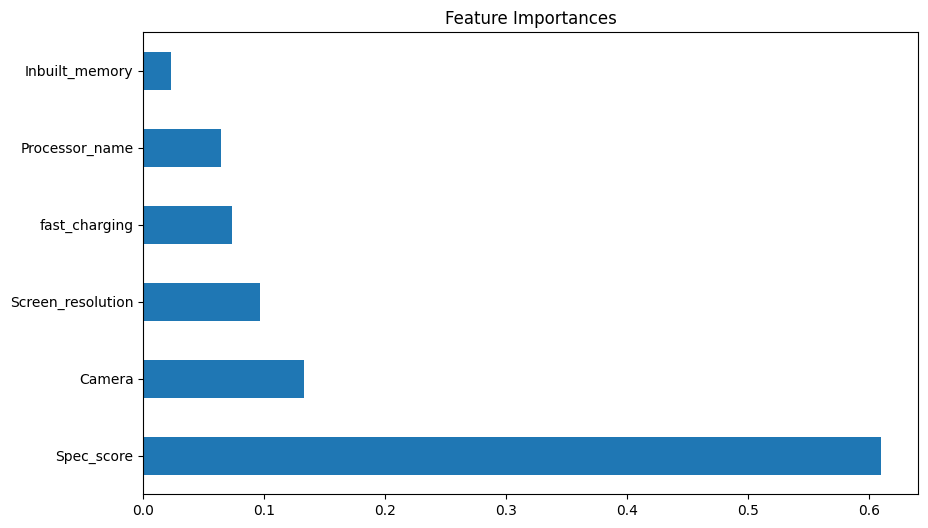

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Determine feature importance using Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [29]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [30]:
# Fit and evaluate multiple regression models

from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)


models # Display the performance of the models

 79%|███████▊  | 33/42 [00:03<00:00,  9.52it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:04<00:00,  9.16it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 526
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 6
[LightGBM] [Info] Start training from score 33242.744292


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.85,0.85,11638.37,0.29
HistGradientBoostingRegressor,0.84,0.84,12215.50,0.42
LGBMRegressor,0.82,0.83,12663.67,0.11
GradientBoostingRegressor,0.82,0.82,12838.28,0.23
RandomForestRegressor,0.81,0.82,13100.81,0.43
BaggingRegressor,0.80,0.80,13497.00,0.06
KNeighborsRegressor,0.76,0.76,14817.75,0.01
XGBRegressor,0.75,0.76,14972.24,0.19
ExtraTreeRegressor,0.71,0.72,16235.60,0.01


In [31]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Replace whitespace in feature names
X_train.columns = [col.replace(" ", "_") for col in X_train.columns]
X_test.columns = [col.replace(" ", "_") for col in X_test.columns]

param_grid = {
    'num_leaves': [31, 50, 70, 90],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [20, 40, 60, 80]
}

# GridSearchCV to find the best parameters
lgbm = LGBMRegressor(verbose=-1)  
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Fit the model
grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-Squared: {r2}')

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 80, 'num_leaves': 31}
RMSE: 12541.964128417796
R-Squared: 0.8308372244679281


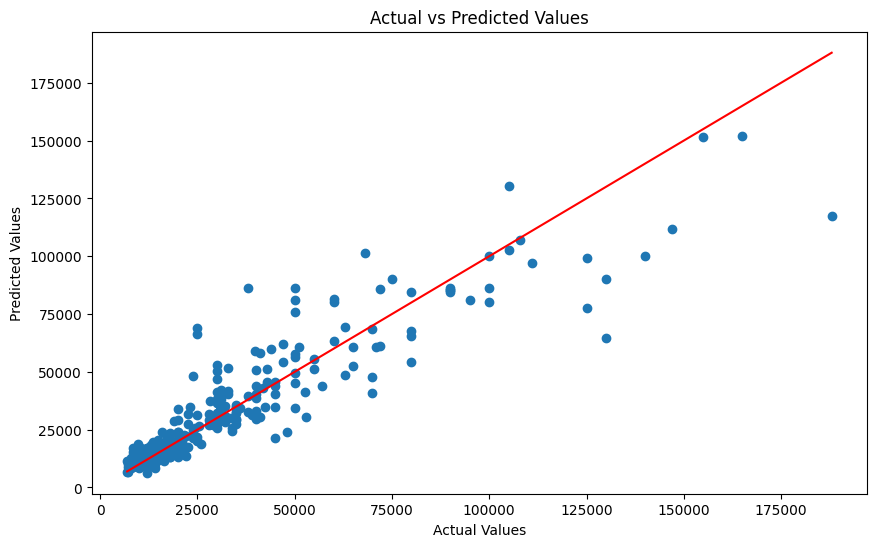

In [32]:
# Compare actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()